# Pub accessibility for Inner London

## Data and preparation

> Pubs (data provided by CAMRA in January 2019)
> https://data.london.gov.uk/download/cultural-infrastructure-map/7e6b0f36-da01-4029-99d7-640d89c4a0a4/Pubs.csv
> Buildings defined by CAMRA as pubs. Licensed premises must be open to and welcome the general public without requiring membership or residency, allow free entry (1), serve at least one draught beer (2), allow drinking without requiring food to be consumed, have at least one indoor area not laid out for meals, and permit drinks to be purchased in person at a bar (3), without relying on table service.’ (1) Except when entertainment is provided on limited occasions (2) Includes cask or keg beer (3) Includes also a hatch or specific service point’
> How data was compiled: Data provided by the Campaign for Real Ale.
> Credit for use: The Campaign for Real Ale

This examples calculates landuse accessibility to pubs for inner London.

For additional information on network preparation, see the corresponding notebook on [graph cleaning](https://colab.research.google.com/github/cityseer/cityseer/blob/master/demo_notebooks/graph_cleaning.ipynb).

This example will make use of OSM data downloaded from the [OSM API](https://wiki.openstreetmap.org/wiki/API) for a 5000m radius around London Soho.

In [7]:
%matplotlib inline
!pip install cityseer
!pip install pyproj

In [8]:
from pyproj import CRS, Transformer
from shapely import geometry
import utm

# starting point
lng, lat = -0.13396079424572427, 51.51371088849723
distance = 5000
easting, northing, utm_zone_number, utm_zone_letter = utm.from_latlon(lat, lng)
centre = geometry.Point(easting, northing)
# CRS transformations
crs_utm = CRS.from_dict({'proj': 'utm', 'zone': utm_zone_number, 'south': False})
crs_bng = CRS.from_epsg(27700)
crs_transformer = Transformer.from_crs(crs_bng, crs_utm, always_xy=True)

In [9]:
# prepare network from OSM
from cityseer.tools import graphs, mock
from cityseer.metrics import networks

# download from OSM - see docs if you want examples for how to use osmNx for this step
G_utm = mock.make_buffered_osm_graph(lng, lat, distance)
# simplify - this is not necessary if using "clean" graph sources - e.g. OS Open Roads
G = graphs.nX_simple_geoms(G_utm)
G = graphs.nX_remove_filler_nodes(G)
G = graphs.nX_remove_dangling_nodes(G,
                                    despine=20,
                                    remove_disconnected=True)
G = graphs.nX_remove_filler_nodes(G)
G1 = graphs.nX_consolidate_nodes(G,
                                 buffer_dist=10,
                                 min_node_group=3)
G2 = graphs.nX_split_opposing_geoms(G1,
                                    buffer_dist=15)
G3 = graphs.nX_consolidate_nodes(G2,
                                 buffer_dist=15,
                                 crawl=False,
                                 min_node_degree=2,
                                 cent_min_degree=4)
# decompose for higher resolution analysis
G_decomp = graphs.nX_decompose(G3, 25)
# create a cityseer network layer
N = networks.NetworkLayerFromNX(G_decomp,
                                distances=[100, 200, 400, 800])

INFO:cityseer.tools.graphs:Converting networkX graph from WGS to UTM.
INFO:cityseer.tools.graphs:Processing node x, y coordinates.


  0%|          | 0/137683 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Processing edge geom coordinates, if present.


  0%|          | 0/155161 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Generating simple (straight) edge geometries.


  0%|          | 0/155161 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/137683 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing dangling nodes.


  0%|          | 0/44875 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/40782 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Consolidating nodes.
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:767: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  p.uid = n
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:768: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  p.degree = nx.degree(networkX_multigraph, n)


  0%|          | 0/38123 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/31447 [00:00<?, ?it/s]

  0%|          | 0/48048 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Splitting opposing edges.
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:782: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.start_uid = s
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:783: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.end_uid = e
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:784: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  linestring.k = k


  0%|          | 0/31349 [00:00<?, ?it/s]

/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:1079: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(split_geoms) < 2:
/Users/gareth/dev/benchmark-urbanism/cityseer-api/cityseer/tools/graphs.py:1081: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  new_edge_geom_a, new_edge_geom_b = split_geoms


  0%|          | 0/49639 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Consolidating nodes.


  0%|          | 0/35314 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Removing filler nodes.


  0%|          | 0/24954 [00:00<?, ?it/s]

  0%|          | 0/39756 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Decomposing graph to maximum edge lengths of 25.


  0%|          | 0/35296 [00:00<?, ?it/s]

INFO:cityseer.tools.graphs:Preparing node and edge arrays from networkX graph.


  0%|          | 0/90229 [00:00<?, ?it/s]

  0%|          | 0/90229 [00:00<?, ?it/s]

In [10]:
# prepare data layer
import pandas as pd
import numpy as np
from cityseer.metrics import layers

# load data from URL
pubs_data = pd.read_csv('https://data.london.gov.uk/download/cultural-infrastructure-map/7e6b0f36-da01-4029-99d7-640d89c4a0a4/Pubs.csv')
# filtering by spatial extents
pubs_data_filtered = pubs_data.loc[np.logical_and(~np.isnan(pubs_data.easting),
                                                  ~np.isnan(pubs_data.northing))]
# unpacking to a dictionary for convenience
labels = []
fd = {}
for idx, data in pubs_data_filtered.iterrows():
    x, y = crs_transformer.transform(data.easting, data.northing)
    loc = geometry.Point(x, y)
    if centre.distance(loc) < distance:
        labels.append('pub')
        fd[idx] = {'x': x, 'y': y}
# create the data layer
DL = layers.DataLayerFromDict(fd)
# assign pubs to network
DL.assign_to_network(Network_Layer=N, max_dist=300)
# to compute accessibilities, provide labels for each datapoint
# and then specify the target labels for which to compute accessibilities
# in this case, all labels are the same as all points are the same data type
# though if working with multiple labels, you can specify multiple targets, e.g. "pub" and "cafe"
DL.compute_accessibilities(landuse_labels=labels,
                           accessibility_keys=['pub'])

  2%|▏         | 1518.0/90229 [00:00<00:18, 4674.08it/s]

INFO:cityseer.metrics.layers:Computing land-use accessibility for: pub



100%|██████████| 90229.0/90229 [02:31<00:00, 593.73it/s]



    Distance weighted Pub accessibility:
    Avg walking tolerance: 35.12m
    Beta: 0.04 (spatial impedance factor)
    Max walking tolerance: 100m
    


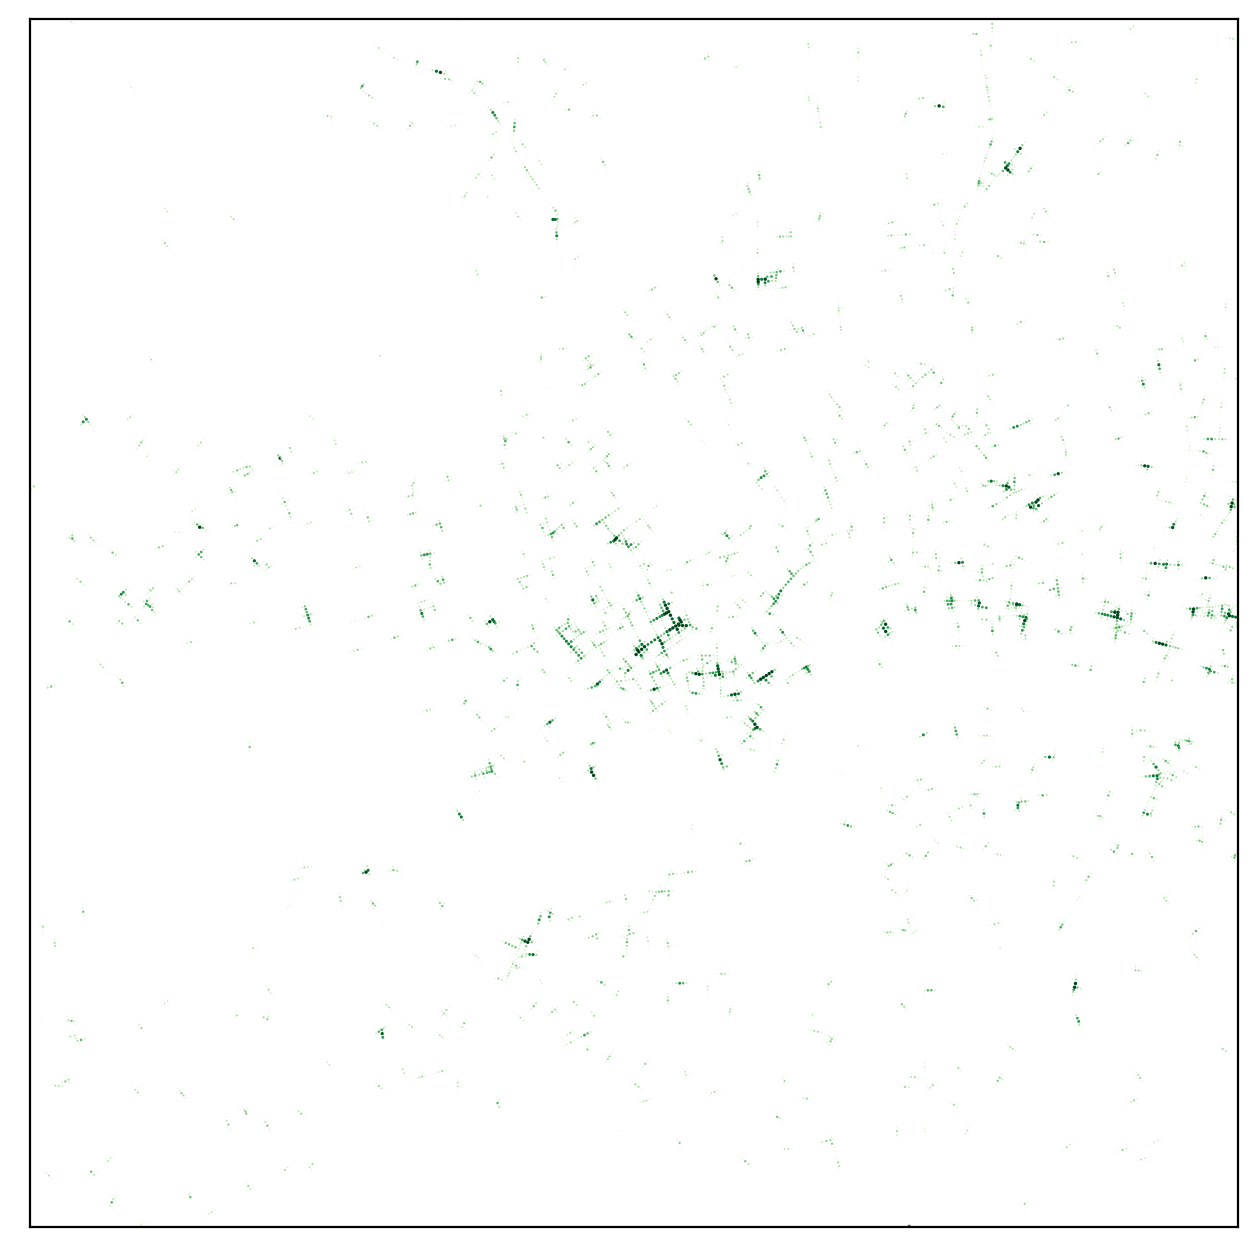


    Distance weighted Pub accessibility:
    Avg walking tolerance: 70.24m
    Beta: 0.02 (spatial impedance factor)
    Max walking tolerance: 200m
    


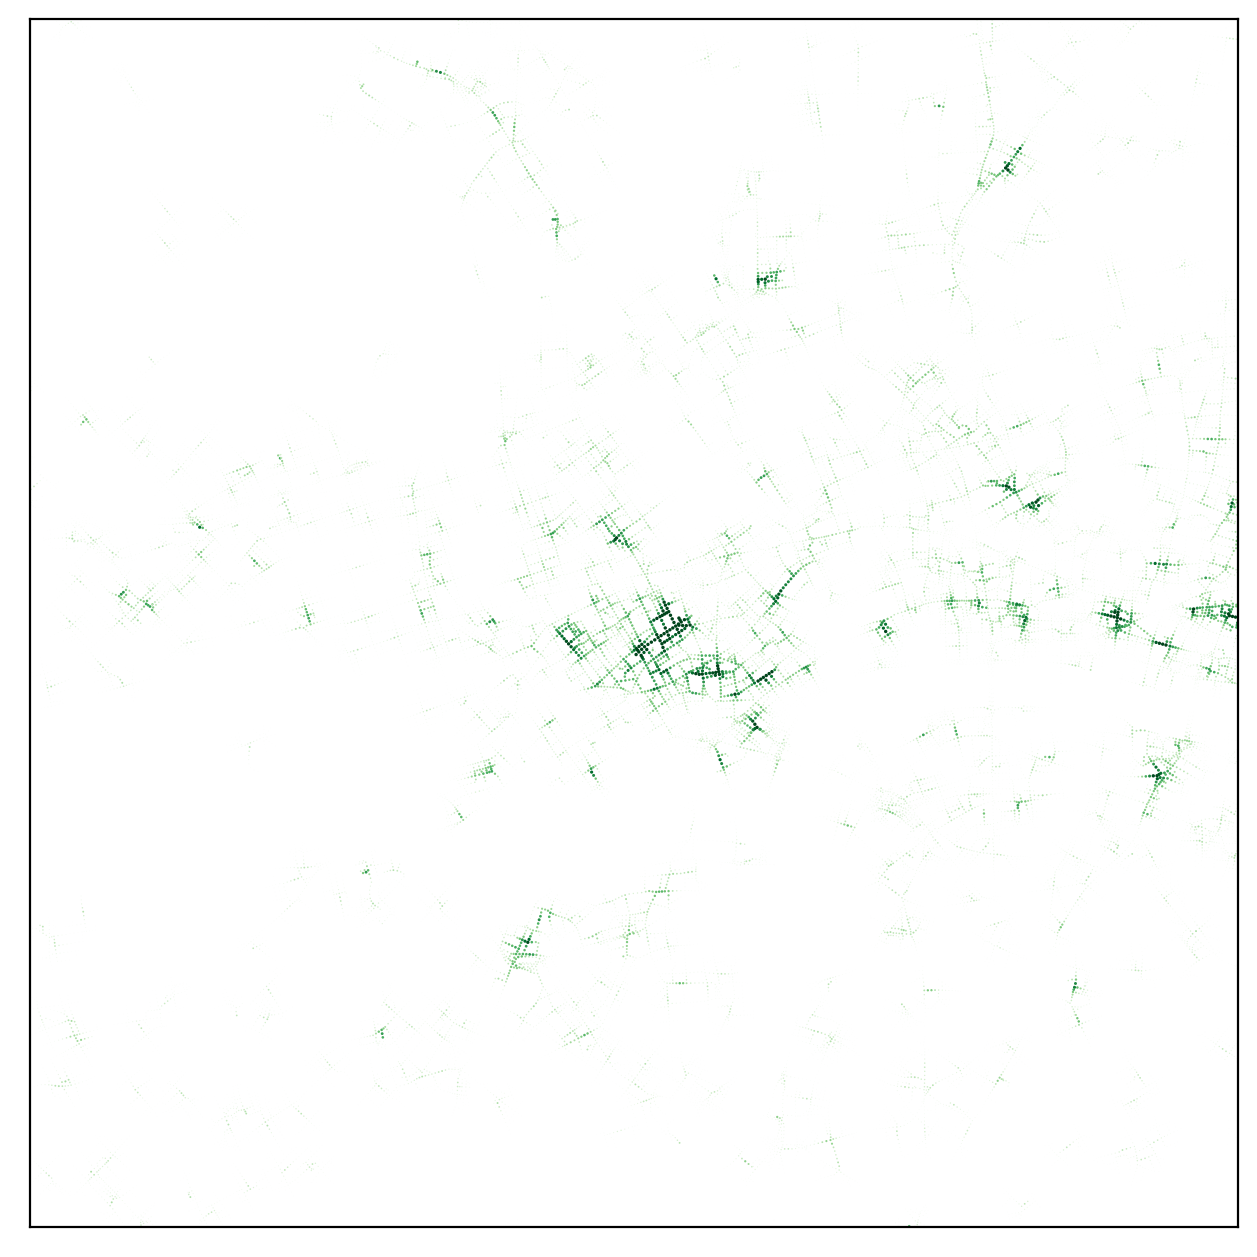


    Distance weighted Pub accessibility:
    Avg walking tolerance: 140.48m
    Beta: 0.01 (spatial impedance factor)
    Max walking tolerance: 400m
    


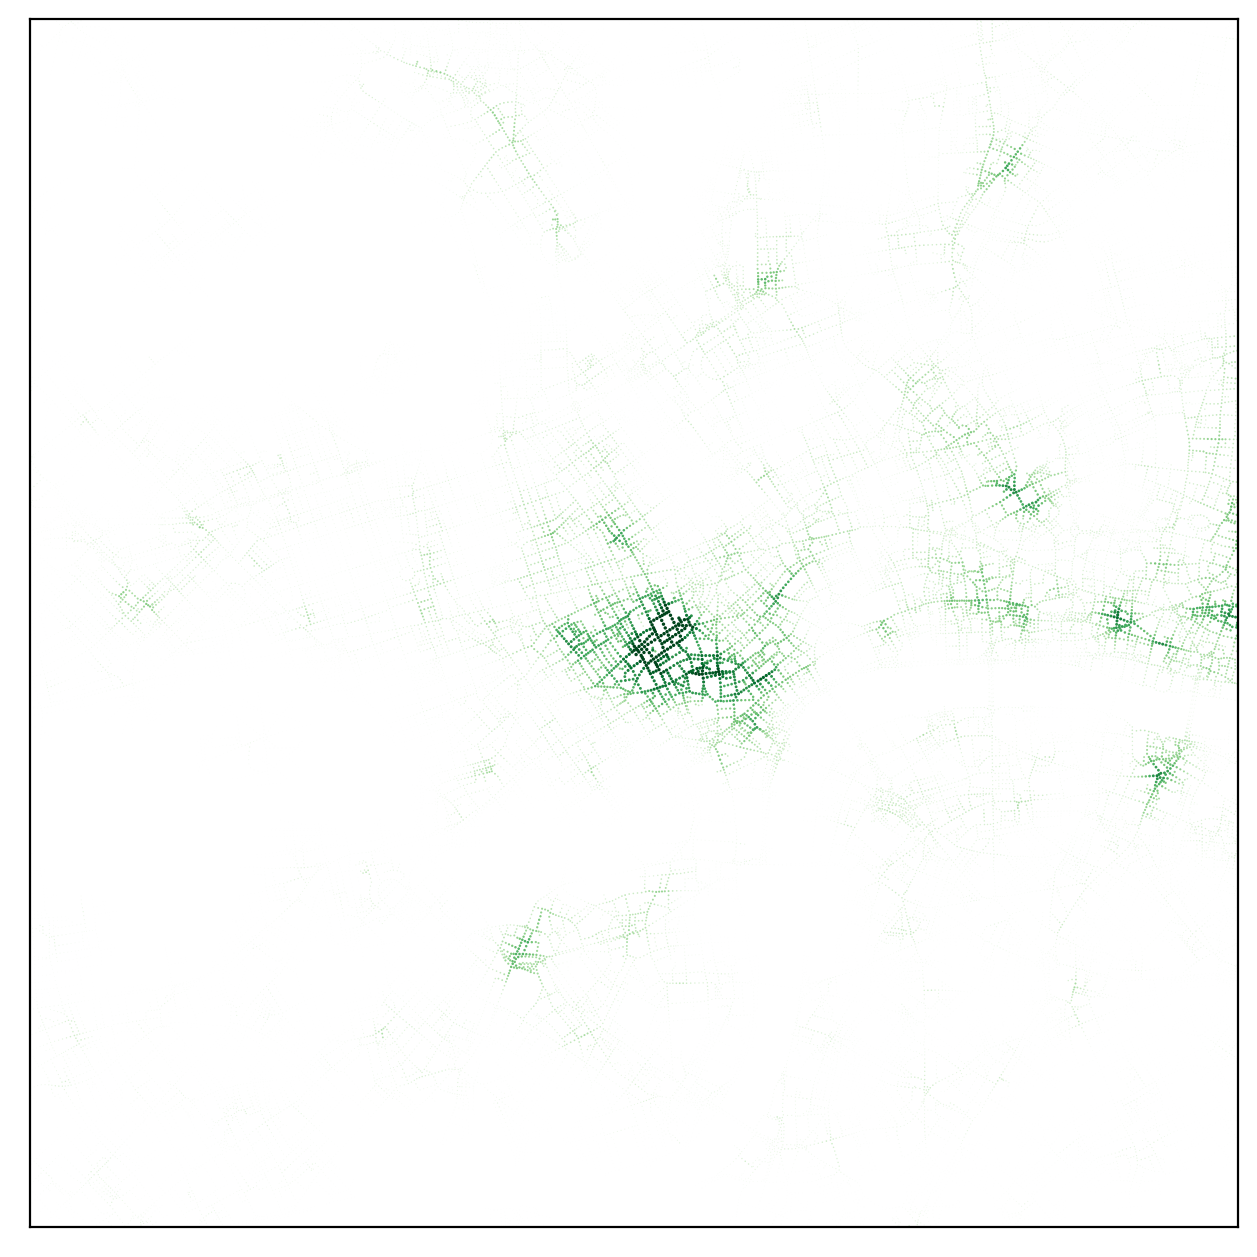


    Distance weighted Pub accessibility:
    Avg walking tolerance: 280.96m
    Beta: 0.005 (spatial impedance factor)
    Max walking tolerance: 800m
    


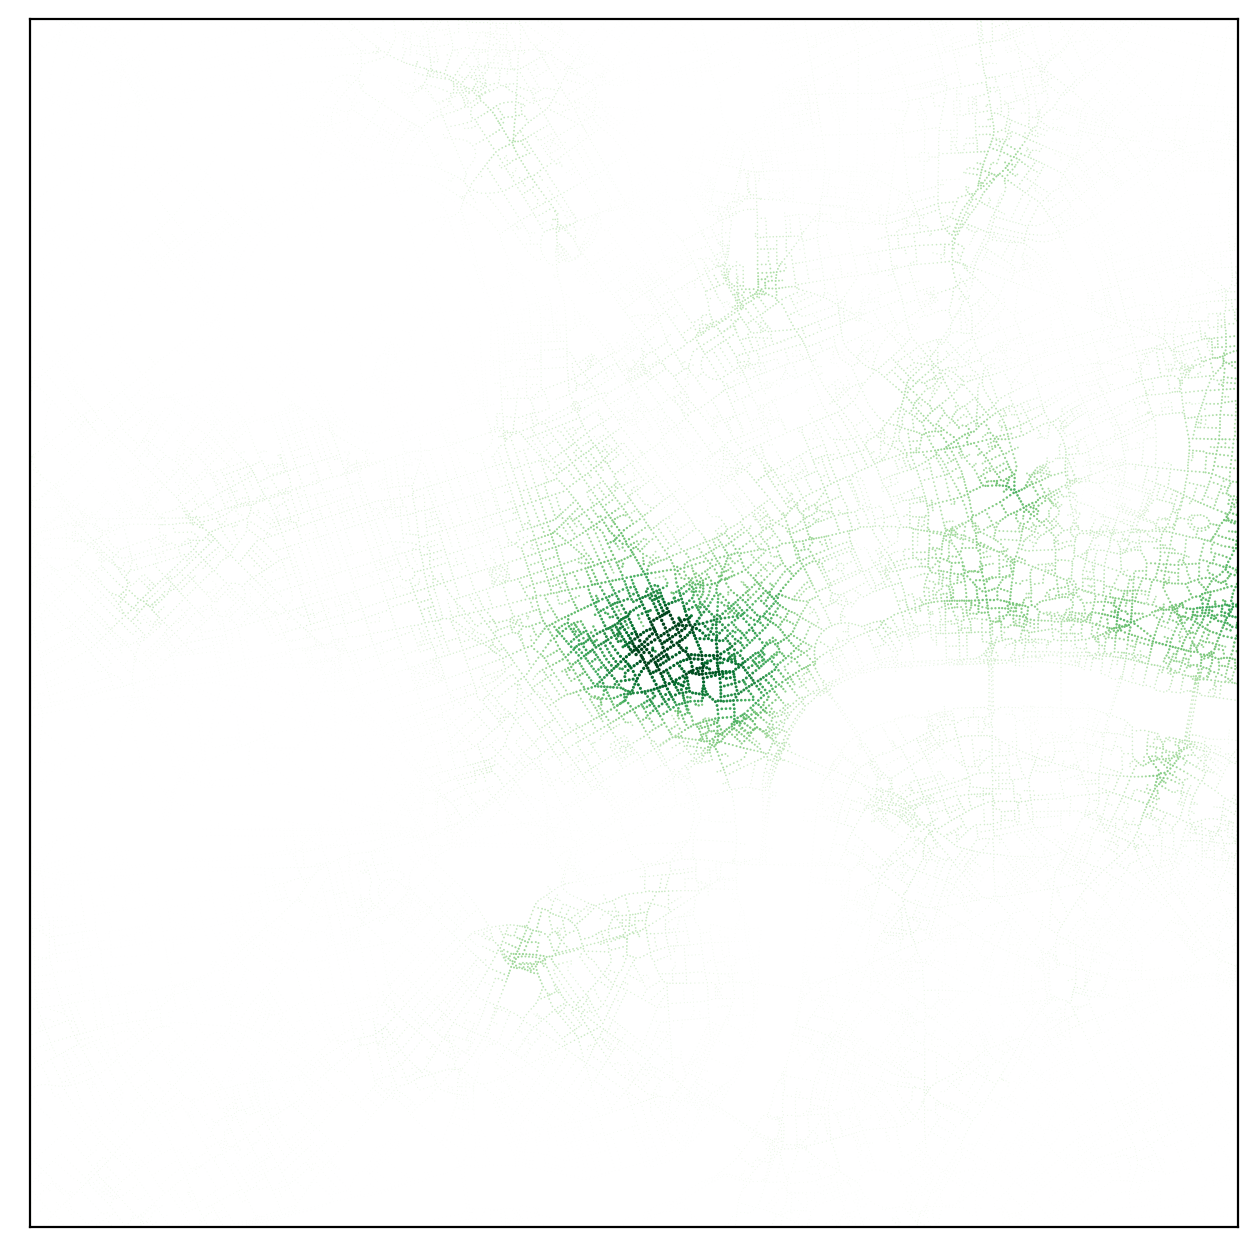

In [17]:
# data can be extracted, plotted, or otherwise manipulated directly from the numpy arrays
# see the getting started guide if you'd prefer to first convert back to NetworkX
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale


def simple_plot(xs: np.ndarray,
                ys: np.ndarray,
                vals: np.ndarray):
    """ """
    # extents
    easting, northing = utm.from_latlon(lat, lng)[:2]
    buff = geometry.Point(easting, northing).buffer(3500)
    min_x, min_y, max_x, max_y = buff.bounds
    # fig
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=200, facecolor='white')
    # filter
    select = xs > min_x
    select = np.logical_and(select, xs < max_x)
    select = np.logical_and(select, ys > min_y)
    select = np.logical_and(select, ys < max_y)
    select_idx = np.where(select)[0]
    # remove any extreme outliers
    v = np.clip(vals, np.nanpercentile(vals, .01), np.nanpercentile(vals, 99.9))
    # shape if wanted
    c = v ** 1
    c = minmax_scale(c, feature_range=(0, 1))
    s = v ** 1
    s = minmax_scale(s, feature_range=(0, 1.5))
    # plot
    ax.scatter(xs[select_idx],
               ys[select_idx],
               c=c[select_idx],
               s=s[select_idx],
               linewidths=0,
               edgecolors='none',
               cmap='Greens')
    # limits
    ax.set_xlim(left=min_x, right=max_x)
    ax.set_ylim(bottom=min_y, top=max_y)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)
    ax.set_facecolor('white')
    plt.show()

for d in [100, 200, 400, 800]:
    b = networks.beta_from_distance(d)[0]
    avg_d = networks.avg_distance_for_beta(b)[0]
    print(f'''
    Distance weighted Pub accessibility:
    Avg walking tolerance: {avg_d:.2f}m
    Beta: {b} (spatial impedance factor)
    Max walking tolerance: {d}m
    ''')
    simple_plot(N.node_x_arr, N.node_y_arr, N.metrics['accessibility']['weighted']['pub'][d])